# Seasonal Autoregressive Integrated Moving Average (SARIMA)

The SARIMA model is similar to the ARIMA model, however, we will be adding another layer of complexity to the ARIMA model to include seasonal pattern in time series. SARIMA model or SARIMA(p,d,q)(P,D,Q)m adds another set of parameters that allows us to take into account periodic patterns when forecasting a time series, which is not always possible with ARIMA(p,d,q) model. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt

data = pd.read_csv('C:/Users/Drew/Downloads/air-passengers.csv')
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


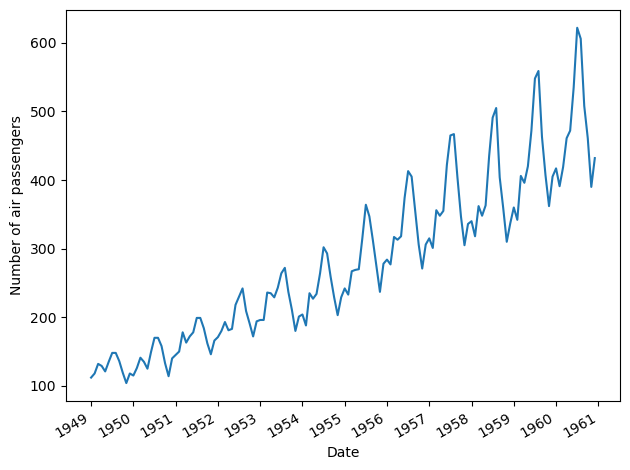

In [2]:
fig, ax = pt.subplots()

ax.plot(data['Month'], data['Passengers'])
ax.set_xlabel('Date')
ax.set_ylabel('Number of air passengers')

pt.xticks(np.arange(0, 145, 12), np.arange(1949, 1962, 1))

fig.autofmt_xdate()
pt.tight_layout()

As we can see from the graph, there is a clear seasonal pattern in the series. The number of air passengers is lower at the beginning and end of the year, and it spikes up during the months of June, July and August. Our objective is to forecast the number of monthly air passengers for one year.

# SARIMA(p,d,q)(P,D,Q)m Model

The first set of parameters is the same as asual, p is the order of AR, d is order of integration, q is the order of MA. There are four new parameters in the SARIMA model, P,D,Q,m. P,D,Q have the same meaning as the ARIMA(p,d,q) model bnut they are their seasonal counterparts. To understand the meaning of these parameters and how they affect the final model, we must first define m. 

The paramter m is defined as frequency. In the context of time series, the frequency is defined as the number of observations per cycle. The length of the cycle will depend on the dataset. For data that was recorded every year, quarter, month, or week, the length of a cycle is considered to be 1 year. If the data was recorded annually, m = 1, since there is only one observation per year. If the data was recorded quarterly, m = 4 since there are four quarters in a year, and therefore four observations per year. Of course, if the data was recorded monthly, m = 12. Finally, for weekly data, m = 52.

When data is collected on a daily or sub-daily basis, there are multiple ways of interpreting the frequency. For example, daily data can have a weekly seasonality. In that case, the frequency is m = 7 because there would be seven observations in a full cycle of 1 week. It could also have a yearly seasonality, meaning that m = 365. Thus, you can see that daily and sub-daily data can have different cycle length, and therefore a different frequency m.

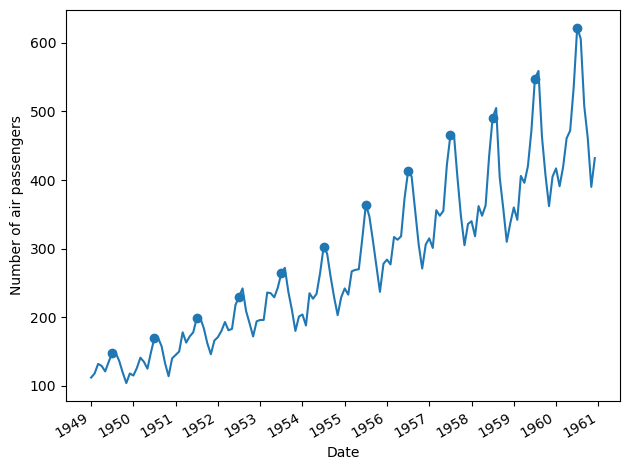

In [3]:
fig, ax = pt.subplots()

ax.plot(data['Month'], data['Passengers'], markevery=np.arange(6, 145, 12), marker='o')
ax.set_xlabel('Date')
ax.set_ylabel('Number of air passengers')

pt.xticks(np.arange(0, 145, 12), np.arange(1949, 1962, 1))

fig.autofmt_xdate()
pt.tight_layout()

Marking the month of July of each year. You can see how the month of July has the highest number of air passengers. Therefore, it would make sense if July of the following year also saw the highest number of air passengers in the year. That kind of information is captured by the seasonal parameters P,D,Q and m of the SARIMA(p,d,q)(P,D,Q)m model.

# Identifying seasonal patterns in a time series

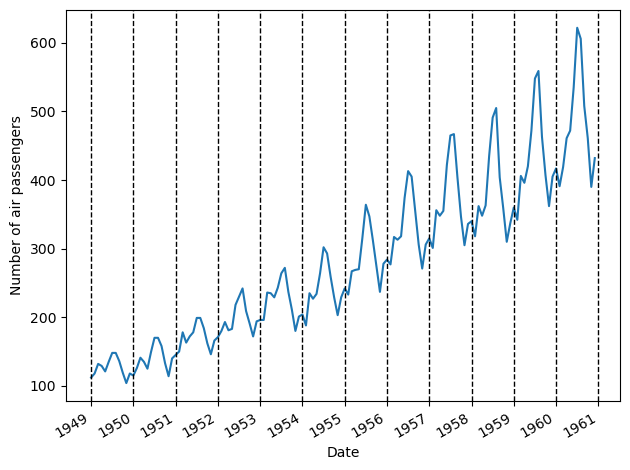

In [4]:
fig, ax = pt.subplots()

ax.plot(data['Month'], data['Passengers'])
for i in np.arange(0, 145, 12):
    ax.axvline(x=i, linestyle='--', color='black', linewidth=1)
ax.set_xlabel('Date')
ax.set_ylabel('Number of air passengers')

pt.xticks(np.arange(0, 145, 12), np.arange(1949, 1962, 1))

fig.autofmt_xdate()
pt.tight_layout()

Highlighting the seasonal pattern in the monthly number of air passengers. The dashed vertical lines separates periods of 12 months. We can clearly see how a peak occurs in the middle of each year, and there is a very similar pattern for the beginning and each of each year. This observation is usually enough to determine that the dataset is seasonal. 

There is another way to identify seasonal patterns as well using Time series decomposition. This method separates the time series into three main components: trend, seasonal, residuals. The trend component represents the long-term change in the time series. This component is responsible for time series that increase or decrease over time. The seasonal component is as the name says, It represents repeated fluctuations that occur over a fixed period of time. Finally, the residuals or, the noise express any irregularity that cannot be explained by the trend or the seasonal component. 

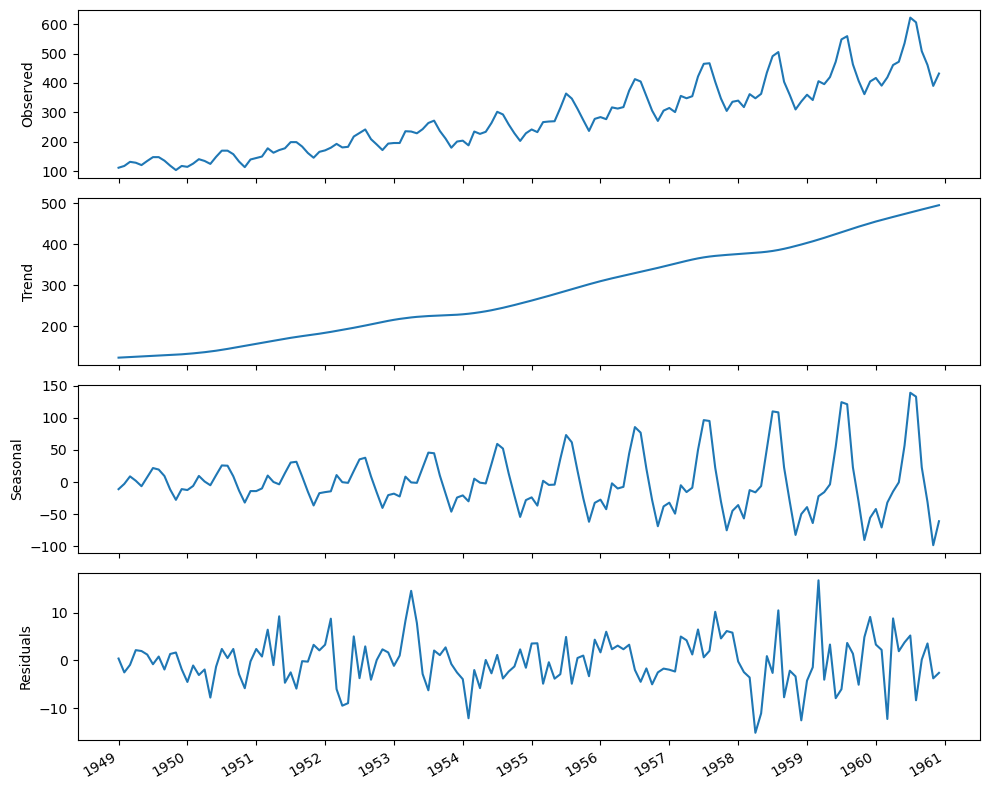

In [5]:
from statsmodels.tsa.seasonal import STL
decomposition = STL(data['Passengers'], period=12).fit()

fig, (ax1, ax2, ax3, ax4) = pt.subplots(nrows=4, ncols=1, sharex=True, figsize=(10,8))

ax1.plot(decomposition.observed)
ax1.set_ylabel('Observed')

ax2.plot(decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(decomposition.seasonal)
ax3.set_ylabel('Seasonal')

ax4.plot(decomposition.resid)
ax4.set_ylabel('Residuals')

pt.xticks(np.arange(0, 145, 12), np.arange(1949, 1962, 1))

fig.autofmt_xdate()
pt.tight_layout()

In situation where we have a time series with no seasonal pattern, the decomposition process will display a flat horizontal line at 0 for the seasonal component. To demonstrate that:

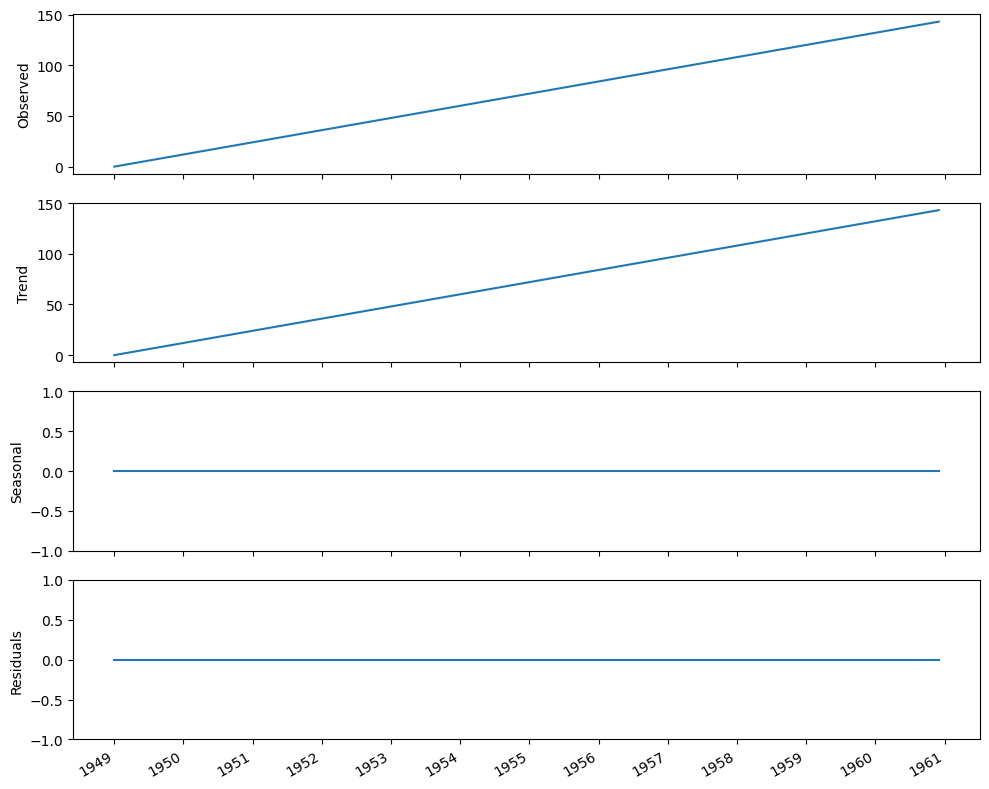

In [6]:
linear_ts = np.arange(0, 144, 1)

decomposition = STL(linear_ts, period=12).fit()

fig, (ax1, ax2, ax3, ax4) = pt.subplots(nrows=4, ncols=1, sharex=True, figsize=(10,8))

ax1.plot(decomposition.observed)
ax1.set_ylabel('Observed')

ax2.plot(decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(decomposition.seasonal)
ax3.set_ylabel('Seasonal')
ax3.set_ylim(-1, 1)

ax4.plot(decomposition.resid)
ax4.set_ylabel('Residuals')
ax4.set_ylim(-1, 1)

pt.xticks(np.arange(0, 145, 12), np.arange(1949, 1962, 1))

fig.autofmt_xdate()
pt.tight_layout()

# Forecasting the Number of Air Passengers
# General Modeling Procedure

First step of gathering data remains unchanged. Then we will check for stationarity and apply transformation in order to set the parameter d. However, we can also perform seasonal differencing to make the series stationary, and D will be equal to the minimum number of times we applied seasonal differencing. 

Then we set a range of possible values for p,q,P, and Q, as the SARIMA model can also incorporate the order of seasonal autoregressive and seasonal moving average processes. Note that the addition of those two new parameters will increase the number of unique combinations of SARIMA(p,d,q)(P,D,Q)m models we can fit, so this step will take longer to complete. The rest of the procedure remains the same, as we still need to select the best model with the lowest AIC and perform residual analysis before using the model for forecasting. Once our modeling procedure is done, we are ready to forecast the total number of monthly air passengers. The objective of this analysis is to forecast 1 year of monthly air passengers by using the data from 1960 as the test set. The Baseline model will be the naive seasonal forecast, and we will use bonth the ARIMA(p,d,q) and SARIMA(p,d,q)(P,D,Q)m models to verity whether the addition of seasonal components yield better forecasts.

In [7]:
from statsmodels.tsa.stattools import adfuller

ADF_result = adfuller(data['Passengers'])
print(f' ADF Statistics: {ADF_result[0]}')
print(f' P-Value: {ADF_result[1]}')

 ADF Statistics: 0.8153688792060597
 P-Value: 0.9918802434376411


In [8]:
data_diff = np.diff(data['Passengers'], n=1)

In [9]:
ADF_result = adfuller(data_diff)
print(f' ADF Statistics: {ADF_result[0]}')
print(f' P-Value: {ADF_result[1]}')

 ADF Statistics: -2.829266824169992
 P-Value: 0.0542132902838265


In [10]:
data_diff2 = np.diff(data['Passengers'], n=2)

In [11]:
ADF_result = adfuller(data_diff2)
print(f' ADF Statistics: {ADF_result[0]}')
print(f' P-Value: {ADF_result[1]}')

 ADF Statistics: -16.384231542468527
 P-Value: 2.732891850014085e-29


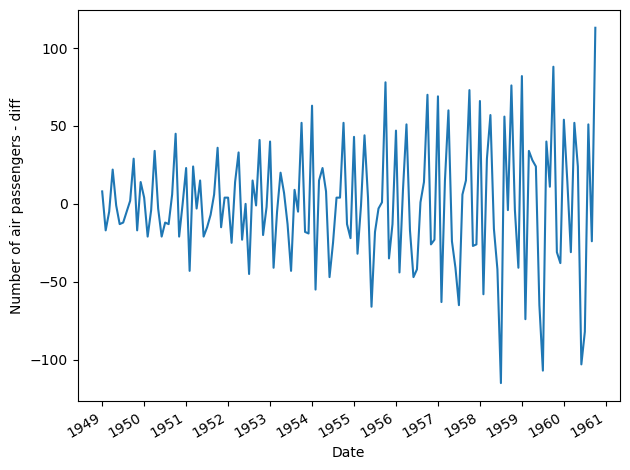

In [12]:
fig, ax = pt.subplots()

ax.plot(data_diff2)
ax.set_xlabel('Date')
ax.set_ylabel('Number of air passengers - diff')

pt.xticks(np.arange(0, 145, 12), np.arange(1949, 1962, 1))

fig.autofmt_xdate()
pt.tight_layout()

In [13]:
from itertools import product

#P,D,Q is set to 0 because we are working with ARIMA model first
ps = range(0,13,1)
qs = range(0,13,1)
Ps = [0]
Qs = [0]

d = 2 
D = 0
s = 12

ARIMA_list = list(product(qs,ps,Ps,Qs))

In [16]:
from typing import Union
from tqdm import tqdm
from statsmodels.tsa.statespace.sarimax import SARIMAX

def optimize_ARIMA(endog: Union[pd.Series, list], order_list: list, d: int) -> pd.DataFrame:
    results = []
    for order in tqdm(order_list):
        try: 
            model = SARIMAX(endog, order=(order[0], d, order[1]), simple_differencing=False).fit(disp=False)
        except:
            continue

        aic = model.aic
        results.append([order,aic])

    result_data = pd.DataFrame(results)
    result_data.columns = ['(p,q)', 'AIC']

    result_data = result_data.sort_values(by='AIC', ascending=True).reset_index(drop=True)

    return result_data

In [24]:
def optimize_SARIMA(endog: Union[pd.Series, list], order_list: list, d: int, D: int, s: int) -> pd.DataFrame:
    results = []
    for order in tqdm(order_list):
        try: 
            model = SARIMAX(
                endog, order=(order[0], d, order[1]), 
                seasonal_order=(order[2], D, order[3], s),
                simple_differencing=False).fit(disp=False)
        except:
            continue

        aic = model.aic
        results.append([order,aic])

    result_data = pd.DataFrame(results)
    result_data.columns = ['(p,q,P,Q)', 'AIC']

    result_data = result_data.sort_values(by='AIC', ascending=True).reset_index(drop=True)

    return result_data

In [25]:
train = data['Passengers'][:-12]
ARIMA_result = optimize_SARIMA(train, ARIMA_list, d,D,s)
ARIMA_result

  2%|█▍                                                                                | 3/169 [00:00<00:06, 27.56it/s]C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Lik

,"(p,q,P,Q)",AIC
0,"(11, 3, 0, 0)",1016.860517
1,"(11, 4, 0, 0)",1019.012636
2,"(12, 0, 0, 0)",1020.386447
3,"(11, 5, 0, 0)",1020.412171
4,"(11, 1, 0, 0)",1021.016159
...,...,...
164,"(5, 0, 0, 0)",1281.732157
165,"(3, 0, 0, 0)",1300.282335
166,"(2, 0, 0, 0)",1302.913196
167,"(1, 0, 0, 0)",1308.152194


C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


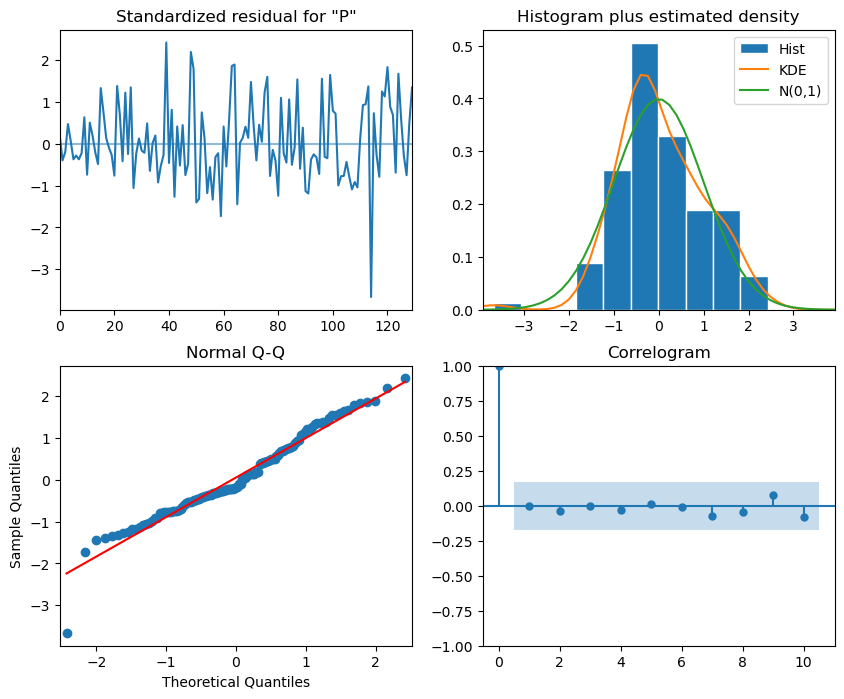

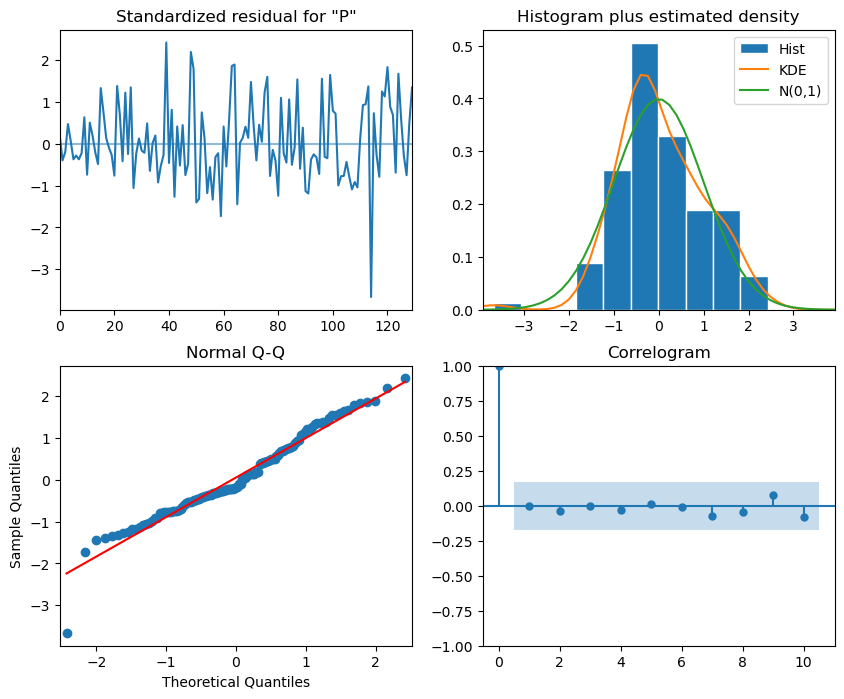

In [26]:
ARIMA_model = SARIMAX(train, order=(11,2,3), simple_differencing=False)
ARIMA_model_fit = ARIMA_model.fit(disp=False)
ARIMA_model_fit.plot_diagnostics(figsize=(10,8))

# IMPORTANT
The top left plot shows the residuals over time. While there is no trend in the residuals, the variance does not seem to be constant, which is discrepancy in comparison to white noise. The top right is the distribution of the residuals. We can see it fairly close to the normal distribution. The Q-Q plot leads us to the same conclusion as it displays a line that is fairly straight, meaning that the residual's distribution is close to a normal distribution. Lastly, the correlogram exhibits no significant autocorrelation coefficients after lag 0, just like white noise. In conclusion, these plots tells us that our residuals are close to white noise, which is a good sign, as it means that the model's errors are random. 

This is because when the residuals closely resemble white noise, it indicates that the model has effectively captured the underlying pattern and structures in the data, leaving only random, uncorrelated noise. When the residuals meet these criteria and closely resemble white noise, it indicates that the model has adequately explained the variability in the data, and the remaining difference are due to random noise.

Residuals are the difference of the actual values and predicted values. These residuals represent the unexplained variability in the data after accounting for the model's predictions. The purpose of the residual analysis is to evaluate whether the model adequately captures the underlying patterns and structures in the data. By comparing it to the white noise, which serves as a baseline, we can assess how well the model explains the variability in the data. 

If the residuals closely resemble white noise, it indicates that the model has effectively captured the systematic patterns in the data, leaving behind only random, uncorrelated noise. In this case, we have confidence that the model is suitable for forecasting future values. On the other hand, if the residuals exhibit systematic patterns, correlations, or non-constant variance, it suggests that the model may not adequately explain all the variability in the data. In such cases, further investigation and possibly model refinement may be necessary to improve the model's performance. 

In [28]:
from statsmodels.stats.diagnostic import acorr_ljungbox

residuals = ARIMA_model_fit.resid
pvalue = acorr_ljungbox(residuals, np.arange(1,11,1))
print(pvalue)

      lb_stat  lb_pvalue
1    6.440891   0.011152
2    6.551069   0.037797
3    6.818110   0.077927
4    7.623069   0.106403
5    8.261752   0.142388
6    8.562565   0.199714
7    9.407657   0.224697
8    9.640050   0.291204
9    9.648769   0.379660
10  11.411524   0.326368


The returned p-values are all greater than 0.05 except for the first 2 lags. This means that according to the Ljung-Box test, we reject the null hypothesis with a 5% chance of being wrong, since we set our significance boundary to 0.05. However, the third value onwards are all greater than 0.05. Thus, we can reject the null hypothesis, concluding that the residuals are uncorrelated starting at lag 3.

This is an interesting situation to dissect, because the graphical analysis of the residuals lead us to conclude that the residuals resemble white noise, but the Ljung-Box test points to some correlation at lags 1 and 2. This means that our ARIMA model is not capturing all information from the data.

In this case, the Ljung-Box test is really telling us that our model is not perfect but it is okay. Since this is part of the exercise of comparing ARIMA and SARIMA, a non seasonal model and a seasonal model. 

As mentioned, we wished to predict a full year of monthly air passengers, using the last 12 months as test set. The baseline model is naive seasonal forecast, where we simply use the number of air passengers of each month of 1959 as a forecast for each month of 1960.

In [56]:
test = data.iloc[-12:]
test['naive_seasonal'] = data['Passengers'].iloc[120:132].values
test

C:\Users\Drew\AppData\Local\Temp\ipykernel_38548\784271608.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['naive_seasonal'] = data['Passengers'].iloc[120:132].values


,Month,Passengers,naive_seasonal
132,1960-01,417,360
133,1960-02,391,342
134,1960-03,419,406
135,1960-04,461,396
136,1960-05,472,420
137,1960-06,535,472
138,1960-07,622,548
139,1960-08,606,559
140,1960-09,508,463
141,1960-10,461,407


In [57]:
ARIMA_pred = ARIMA_model_fit.get_prediction(132,143).predicted_mean
test['ARIMA_pred'] = ARIMA_pred
test

C:\Users\Drew\AppData\Local\Temp\ipykernel_38548\1587760852.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['ARIMA_pred'] = ARIMA_pred


,Month,Passengers,naive_seasonal,ARIMA_pred
132,1960-01,417,360,422.143444
133,1960-02,391,342,410.558064
134,1960-03,419,406,461.637823
135,1960-04,461,396,457.437488
136,1960-05,472,420,481.433978
137,1960-06,535,472,530.703589
138,1960-07,622,548,606.018991
139,1960-08,606,559,615.331605
140,1960-09,508,463,525.699442
141,1960-10,461,407,467.350948


In [32]:
#Forecasting with SARIMA model now
ps = range(0,4,1)
qs = range(0,4,1)
Ps = range(0,4,1)
Qs = range(0,4,1)

SARIMA_order_list = list(product(ps,qs,Ps,Qs))

train = data['Passengers'][:-12]

d = 1
D = 1 
s = 12

SARIMA_result = optimize_SARIMA(train, SARIMA_order_list, d, D, s)
SARIMA_result

  1%|▉                                                                                 | 3/256 [00:00<00:19, 12.81it/s]C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
  2%|█▌                                                                                | 5/256 [00:01<01:09,  3.62it/s]C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
  3%|██▏                                                                               | 7/256 [00:02<01:28,  2.81it/s]C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting paramete

,"(p,q,P,Q)",AIC
0,"(2, 1, 1, 2)",892.241198
1,"(2, 1, 2, 1)",894.040682
2,"(2, 1, 1, 3)",894.094972
3,"(1, 0, 1, 2)",894.290109
4,"(0, 1, 1, 2)",894.995190
...,...,...
248,"(0, 0, 2, 0)",906.940147
249,"(3, 2, 0, 3)",907.181875
250,"(0, 0, 3, 2)",907.476796
251,"(0, 0, 3, 0)",908.742583


C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


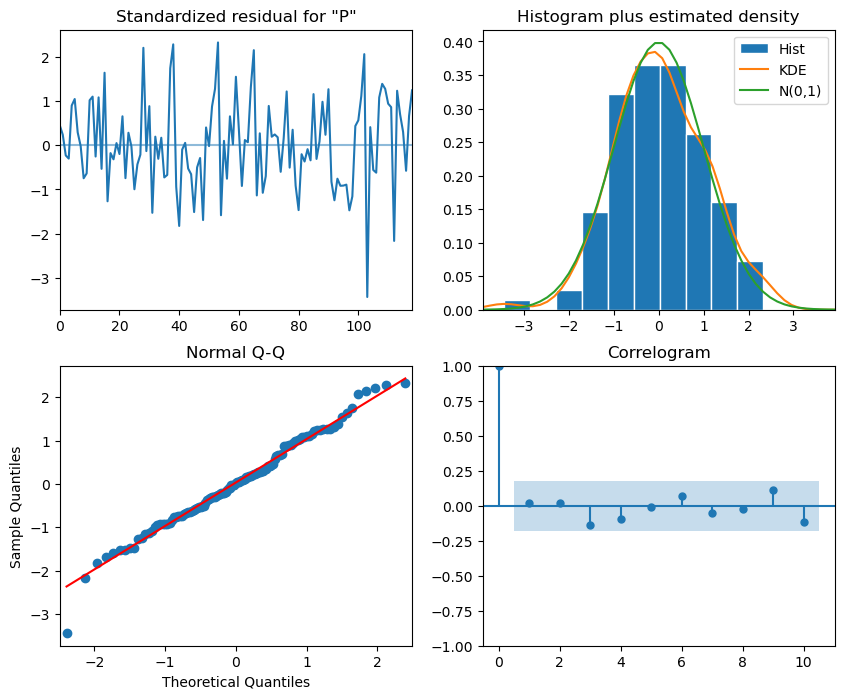

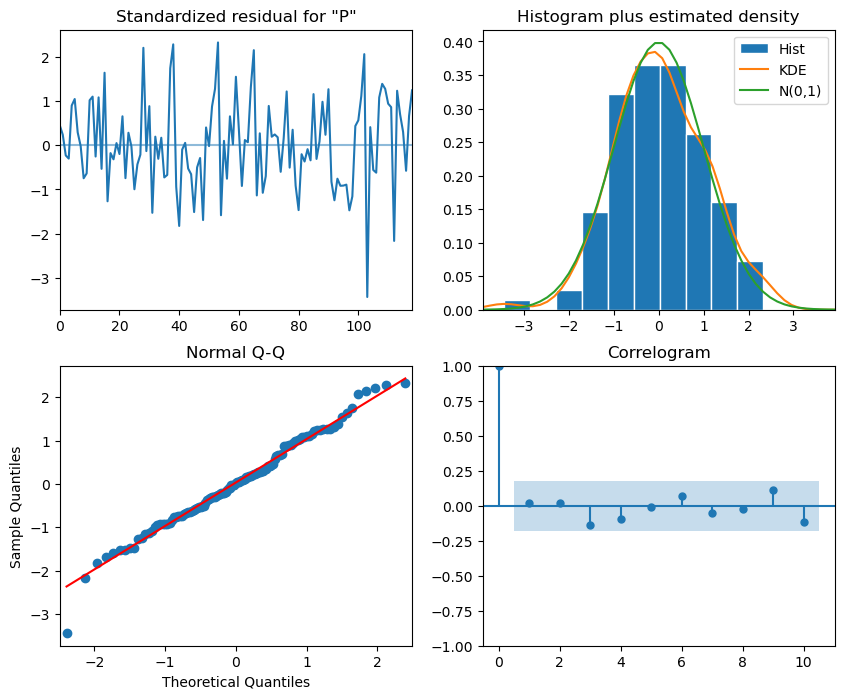

In [34]:
SARIMA_model = SARIMAX(train, order=(2,1,1), seasonal_order=(1,1,2,12), simple_differencing=False)
SARIMA_model_fit = SARIMA_model.fit(disp=False)
SARIMA_model_fit.plot_diagnostics(figsize=(10,8))

In [36]:
residuals = SARIMA_model_fit.resid
pvalue = acorr_ljungbox(residuals, np.arange(1,11,1))
print(pvalue)

     lb_stat  lb_pvalue
1   0.004885   0.944278
2   0.745316   0.688901
3   1.021387   0.796077
4   1.225958   0.873807
5   1.436377   0.920293
6   1.711207   0.944253
7   2.306972   0.940918
8   2.716688   0.950860
9   2.732864   0.973952
10  4.966736   0.893389


In [58]:
SARIMA_pred = SARIMA_model_fit.get_prediction(132,143).predicted_mean
test['SARIMA_pred'] = SARIMA_pred
test

C:\Users\Drew\AppData\Local\Temp\ipykernel_38548\1106361375.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['SARIMA_pred'] = SARIMA_pred


,Month,Passengers,naive_seasonal,ARIMA_pred,SARIMA_pred
132,1960-01,417,360,422.143444,418.525544
133,1960-02,391,342,410.558064,399.593949
134,1960-03,419,406,461.637823,461.334127
135,1960-04,461,396,457.437488,451.466468
136,1960-05,472,420,481.433978,473.774912
137,1960-06,535,472,530.703589,538.793824
138,1960-07,622,548,606.018991,612.477590
139,1960-08,606,559,615.331605,624.658552
140,1960-09,508,463,525.699442,520.200200
141,1960-10,461,407,467.350948,462.879566


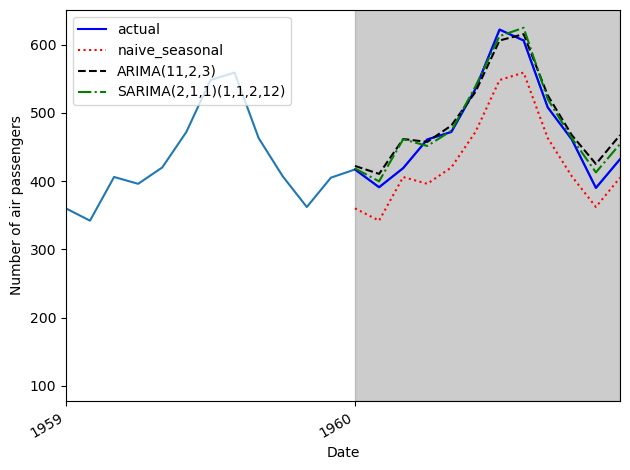

In [59]:
fig, ax = pt.subplots()

ax.plot(data['Month'], data['Passengers'])
ax.plot(test['Passengers'], 'b-', label='actual')
ax.plot(test['naive_seasonal'], 'r:', label='naive_seasonal')
ax.plot(test['ARIMA_pred'], 'k--', label='ARIMA(11,2,3)')
ax.plot(test['SARIMA_pred'], 'g-.', label='SARIMA(2,1,1)(1,1,2,12)')

ax.set_xlabel('Date')
ax.set_ylabel('Number of air passengers')
ax.axvspan(132,143, color="#808080", alpha=0.4)
ax.legend(loc=2)

pt.xticks(np.arange(0,145,12), np.arange(1949, 1962,1))
ax.set_xlim(120,143)
fig.autofmt_xdate()
pt.tight_layout()

In [60]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [61]:
ARIMA_mape = mape(test['Passengers'], test['ARIMA_pred'])
SARIMA_mape = mape(test['Passengers'], test['SARIMA_pred'])

In [62]:
print(ARIMA_mape, SARIMA_mape)

3.844255434979497 2.8527731576688096


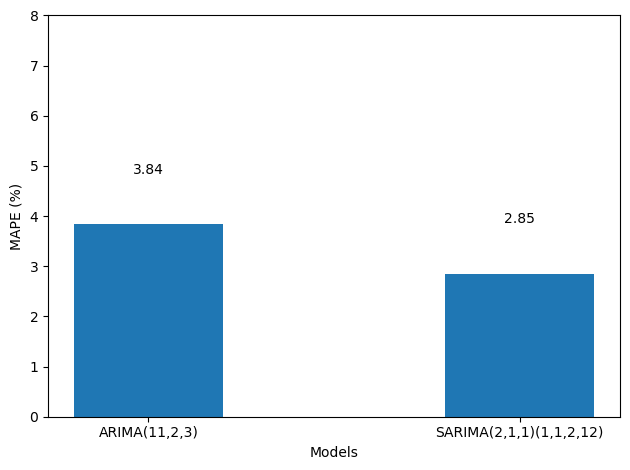

In [65]:
fig, ax = pt.subplots()

x = ['ARIMA(11,2,3)', 'SARIMA(2,1,1)(1,1,2,12)']
y = [ARIMA_mape, SARIMA_mape]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Models')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 8)

for index, value in enumerate(y):
    pt.text(x=index, y=value + 1, s=str(round(value,2)), ha='center')

pt.tight_layout()

# Summary

- The Seasonal Autoregressive Moving Average Model, SARIMA(p,d,q)(P,D,Q)m adds seasonal properties to the ARIMA model.
- P is the order of the seasonal autoregressive process, D is the order of seasonal integration, Q is the order of the seasonal moving average process, and m is the frequency of the data.
- The frequency m corresponds to the number of observations in a cycle. If the data is collected every month, m = 12. If the data is collected every quarter, m = 4.
- Time series decomposition can be used to identify seasonal patterns in a time series.
